In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)


# Homework 4

## Question 1 

It was stated in the text that classifying an observation to the class for which (4.17) is largest is equivalent to classifying an observation to the class for which (4.18) is largest. Prove that this is the case. In other words, under the assumption that the observations in the kth class are drawn from a $N(\mu_{k}, \sigma^{2})$ distribution, the Bayes classifier assigns an observation to the class for which the discriminant function is maximized.

$$
p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2\pi\sigma}} \exp\left(-\frac{1}{2\sigma^2} (x - \mu_k)^2\right)}
{\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi\sigma}} \exp\left(-\frac{1}{2\sigma^2} (x - \mu_l)^2\right)}
$$

$$
\delta_k(x) = \frac{x \cdot \mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)
$$

The Bayes classifier assigns an observation $ x $ to the class $ k $ that **maximizes the posterior probability**:

$$
p_k(x) = P(Y = k | X = x)
$$

We can apply Baye's Theorem to express the class-conditional probability as the quotient of the prior against our posteriors and express $ p_k(x) $ as:

$$
p_k(x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K} \pi_l f_l(x)}
$$

where $$ \pi_k $$ is the prior probability of class $ k $ and $ f_k(x) $ is the probability density function (PDF) of $ X $ given class $ k $, which follows a normal distribution:

$$
f_k(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu_k)^2}{2\sigma^2}\right)
$$

And so we can write the posterior probability as:

$$
p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu_k)^2}{2\sigma^2}\right)}
{\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu_l)^2}{2\sigma^2}\right)}
$$

To classify an observation, we select the class that **maximizes $ p_k(x) $**.

Since the denominator of $ p_k(x) $ is common to all classes, maximizing $ p_k(x) $ is equivalent to **maximizing its numerator**:

$$
\pi_k \exp\left(-\frac{(x - \mu_k)^2}{2\sigma^2}\right)
$$

We take the log in order to simplify the quotient operation into a subtraction between logs.

$$
\log \left( \pi_k \exp\left(-\frac{(x - \mu_k)^2}{2\sigma^2}\right) \right)
$$

Applying logarithm properties:

$$
\log(\pi_k) + \log \left(\exp\left(-\frac{(x - \mu_k)^2}{2\sigma^2}\right) \right)
$$

$$
\log(\pi_k) - \frac{(x - \mu_k)^2}{2\sigma^2}
$$

$$
\log(\pi_k) - \frac{x^2 - 2x\mu_k + \mu_k^2}{2\sigma^2}
$$

Which can be rearranged to $\frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k) = \delta_k(x) $.

## Question 2

In Quadratic Discriminant Analysis (QDA), observations in each class are assumed to follow a normal distribution with class-specific mean $ \mu_k $ and class-specific variance $ \sigma_k^2 $:

$$
X \sim N(\mu_k, \sigma_k^2)
$$

The PDF for a one-dimensional normal distribution is:

$$
f_k(x) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp\left(-\frac{(x - \mu_k)^2}{2\sigma_k^2}\right)
$$

The Bayes classifier assigns an observation $ x $ to the class $ k $ that maximizes the class-conditional probability:

$$
p_k(x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K} \pi_l f_l(x)}
$$

where $ \pi_k $ is the prior probability of class $ k $.

Since the denominator is the same for all classes, maximizing $ p_k(x) $ is equivalent to maximizing the numerator:

$$
\pi_k \cdot \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp\left(-\frac{(x - \mu_k)^2}{2\sigma_k^2}\right)
$$

$$
\log \left(\pi_k \cdot \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp\left(-\frac{(x - \mu_k)^2}{2\sigma_k^2}\right) \right)
$$

The key here is to simplify the calculation by expressing the log of a quotient as the difference of logs.

$$
\log(\pi_k) - \frac{1}{2} \log (2\pi\sigma_k^2) - \frac{(x - \mu_k)^2}{2\sigma_k^2}
$$

Ignoring the constant term $ -\frac{1}{2} \log (2\pi) $ (which does not affect classification), we define the **QDA discriminant function**:

$$
\delta_k(x) = -\frac{1}{2} \log (\sigma_k^2) - \frac{(x - \mu_k)^2}{2\sigma_k^2} + \log \pi_k
$$

The Bayes classifier assigns $ x $ to the class for which $ \delta_k(x) $ is **largest**. The decision boundary between **two classes $ i $ and $ j $** occurs when:

$$
\delta_i(x) = \delta_j(x)
$$

Substituting the discriminant functions:

$$
-\frac{1}{2} \log (\sigma_i^2) - \frac{(x - \mu_i)^2}{2\sigma_i^2} + \log \pi_i
=
-\frac{1}{2} \log (\sigma_j^2) - \frac{(x - \mu_j)^2}{2\sigma_j^2} + \log \pi_j
$$

Rearrange:

$$
-\frac{(x - \mu_i)^2}{2\sigma_i^2} + \log \pi_i - \frac{1}{2} \log \sigma_i^2
=
-\frac{(x - \mu_j)^2}{2\sigma_j^2} + \log \pi_j - \frac{1}{2} \log \sigma_j^2
$$

Multiply by $ -2 $ to simplify:

$$
\frac{(x - \mu_i)^2}{\sigma_i^2} - 2 \log \pi_i + \log \sigma_i^2
=
\frac{(x - \mu_j)^2}{\sigma_j^2} - 2 \log \pi_j + \log \sigma_j^2
$$

Expanding the squared terms:

$$
\frac{x^2 - 2x\mu_i + \mu_i^2}{\sigma_i^2} - 2 \log \pi_i + \log \sigma_i^2
=
\frac{x^2 - 2x\mu_j + \mu_j^2}{\sigma_j^2} - 2 \log \pi_j + \log \sigma_j^2
$$

Rearrange all terms to one side so the result follows the quadratic formula.

$$
x^2 \left(\frac{1}{\sigma_i^2} - \frac{1}{\sigma_j^2} \right)
+ x \left(\frac{2\mu_j}{\sigma_j^2} - \frac{2\mu_i}{\sigma_i^2} \right)
+ \left(\frac{\mu_i^2}{\sigma_i^2} - \frac{\mu_j^2}{\sigma_j^2} - 2\log\frac{\pi_i}{\pi_j} + \log\frac{\sigma_i^2}{\sigma_j^2} \right) = 0
$$


## Question 3

**ISL Chapter 4, Question 5: A, B, D**

**(a)** For the training set, QDA will provide better fit because the QDA decision bonudary is more flexible than LDA's rigid boundary. This means that the classifier will be overfit to the training dataset, which will cause it to perform worse than LDA on the test set.

**(b)** If the decision boundary is truly non-linear, we would expect QDA to perform better on both the test set and the training set since the flexible decision boundary will better distinguish classes without overfitting to the training set during model fitting.

**(d)** This is false because the test error rate would be worse using QDA to fit a linear decision boundary. The QDA decision boundary would be overly flexible and contort to the training data to the extent of being overfit. Once the test data is introduced to the algorithm, then the QDA classifier would perform worse on these observations than LDA.

## Question 4

# **Probability of a Company Issuing a Dividend Given Last Year's Profit \( X = 4 \)**

We will use **Bayes' Theorem** to compute the probability that a company will issue a dividend (\( Y = \text{Yes} \)) given that its last year's profit was \( X = 4 \).

---

## **Step 1: Define Given Information**
- The **prior probabilities**:
  \[
  P(Y = \text{Yes}) = 0.8, \quad P(Y = \text{No}) = 0.2
  \]
- The **means**:
  \[
  \mu_{\text{Yes}} = 10, \quad \mu_{\text{No}} = 0
  \]
- The **variance**:
  \[
  \sigma^2 = 36 \Rightarrow \sigma = \sqrt{36} = 6
  \]
- The **probability density function (PDF)** of a normal distribution:
  \[
  f(x | Y) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
  \]

---

## **Step 2: Compute Class-Conditional Densities \( f(X=4 | Y) \)**

### **For \( Y = \text{Yes} \) (Company issues a dividend):**
\[
f(4 | Y = \text{Yes}) = \frac{1}{\sqrt{2\pi (6^2)}} \exp\left(-\frac{(4 - 10)^2}{2(6^2)}\right)
\]

\[
= \frac{1}{\sqrt{72\pi}} \exp\left(-\frac{(-6)^2}{72}\right)
\]

\[
= \frac{1}{\sqrt{72\pi}} \exp\left(-\frac{36}{72}\right)
\]

\[
= \frac{1}{\sqrt{72\pi}} \exp(-0.5)
\]

Using **\( e^{-0.5} \approx 0.6065 \) and \( \sqrt{72\pi} \approx 15.09 \)**:

\[
f(4 | Y = \text{Yes}) = \frac{0.6065}{15.09} \approx 0.0402
\]

---

### **For \( Y = \text{No} \) (Company does not issue a dividend):**
\[
f(4 | Y = \text{No}) = \frac{1}{\sqrt{2\pi (6^2)}} \exp\left(-\frac{(4 - 0)^2}{2(6^2)}\right)
\]

\[
= \frac{1}{\sqrt{72\pi}} \exp\left(-\frac{(4)^2}{72}\right)
\]

\[
= \frac{1}{\sqrt{72\pi}} \exp\left(-\frac{16}{72}\right)
\]

\[
= \frac{1}{\sqrt{72\pi}} \exp(-0.2222)
\]

Using **\( e^{-0.2222} \approx 0.800 \)**:

\[
f(4 | Y = \text{No}) = \frac{0.800}{15.09} \approx 0.0530
\]

---

## **Step 3: Apply Bayes' Theorem**
We compute:

\[
P(Y = \text{Yes} | X = 4) = \frac{P(Y = \text{Yes}) f(4 | Y = \text{Yes})}{P(Y = \text{Yes}) f(4 | Y = \text{Yes}) + P(Y = \text{No}) f(4 | Y = \text{No})}
\]

Substituting the known values:

\[
P(Y = \text{Yes} | X = 4) = \frac{(0.8)(0.0402)}{(0.8)(0.0402) + (0.2)(0.0530)}
\]

\[
= \frac{0.03216}{0.03216 + 0.0106}
\]

\[
= \frac{0.03216}{0.04276} \approx 0.752
\]

---

## **Final Answer**
\[
P(Y = \text{Yes} | X = 4) \approx 0.752
\]

Thus, given that a company's percentage profit last year was \( X = 4 \), the probability that it will issue a dividend this year is **approximately 75.2%**. ✅

## Question 5

Suppose that you have one continuous predictor $X$ and a binary categorical response $Y$ , which can take values 1 or 2. Suppose that you collect training data from the two classes and obtain class-specific sample means $\hat{\mu}_{1}=-1$ and $\hat{\mu}_{2}=3$, together with the pooled variance estimate over the two classes, $\hat{\sigma}^{2}=1$.

### Part A

Assume equal class priors and derive the LDA classification rule for this problem. Using `scipy.stats.norm.pdf` to compute the necessary probability density functions, show both of the estimated class-conditional densities in the same plot. Also show the estimated Bayes decision boundary in this plot. Make sure to label the axes. Let $c$ denote the position of the decision boundary. Report the numerical value of $c$.

We can use the definition of the LDA decision boundary below and plug in the values with which we're familiar, including $\mu_k$, $\Sigma$, and $\pi_k$ in order to derive the exact location of the decision boundary where the class-conditional probabilities are equal. The decision boundary is shown in the visualization of the distributions in Figure 4.1.

$$
\delta_k(x) = x^{T}\Sigma^{-1}\mu_k-\frac{1}{2} \mu_k^{T}\Sigma^{-1}\mu_k+ \log \pi_k
$$

$$
\delta_{1}(x) = \delta_{2}(x)
$$

$$
x\frac{-1}{1}-\frac{(-1)^2}{2}=x\frac{3}{1}-\frac{(3)^2}{2}
$$

$$
x-0.5x=3x-4.5
$$

$$
x=1
$$


### Part B

Suppose the estimates were in fact obtained from 100 training points, among which 40 were from class 1 and 60 were from class 2. Further, suppose that you will estimate class priors from data. Assume that the class-specific sample means are still $\hat{\mu}_{1}=-1$ and $\hat{\mu}_{2}=3$, and the pooled variance estimate over the two classes is still $\hat{\sigma}^{2} = 1$. Now you could obtain an estimate of the Bayes decision boundary from this new LDA model; let us call the estimate $\~{c}$. Without actually doing this, would you be able to tell whether $\~{c}$ will be the same as, less than, or greater than c, or is there no way to tell? Explain your answer without calculating $\~{c}$. Note: It is okay to recheck your answer once you have actually calculated $\~{c}$ in part (c), but your explanation must not involve the numerical value.

The only thing that changes about the classifier is the priors which were previously taken to be equal to one another. This meant that the $log{\pi_{k}}$ term that previously evaluated to 0 will now apply a penalty to the class-conditional probability, with a greater penalty being applied to the less-likely class prior. This means that the decision boundary, $\~{c}$, will shift toward the class with the lower prior class probability.

### Part C

Now calculate the new boundary value $\~{c}$ described in part (b).

$$
\delta_{1}(x) + \log{0.4} = \delta_{2}(x) + \log{0.6}
$$

$$
x-0.5 + \log{0.4} =3x-4.5 + \log{0.6}
$$

$$
x - 1.41629 = 3x - 5.0108
$$

$$
x = 0.88
$$


### Part D

Suppose in addition to the pooled covariance value $\widehat{\sigma}^{2}$ I now tell you that the class-specific covariances were estimated as $\widehat{\sigma}^{2}_{1} = 0.25$ and $\widehat{\sigma}^{2}_{2} = 1.5$. Based on this new information, would you recommend using LDA or QDA? Why?

I'd recommend QDA because there is no assumption that the covariance structure of the classes is the same during the model fitting. This allows for a more flexible decision boundary that allows for more precision when assigning class-conditional probabilities.

### Part E

Derive the QDA rule if $\widehat{\sigma}^{2}_{1} = 0.25$ and $\widehat{\sigma}^{2}_{2} = 1.5$ and $\widehat{\mu}_{1}=-1$ and $\widehat{\mu}_{2}=3$, assuming equal class priors. Calculate the numerical value for all points in the decision boundary of this rule.

One key thing to note is that the class priors are equal, which indicates that the log-term that was present in previous exercises will cancel out and make for a simpler calculation.

$$
\delta_1(x) = \delta_2(x)
$$

which simplifies to:

$$
-\frac{1}{2} \log (\sigma_1^2) - \frac{(x - \mu_1)^2}{2\sigma_1^2} = -\frac{1}{2} \log (\sigma_2^2) - \frac{(x - \mu_2)^2}{2\sigma_2^2}
$$

We know that $\widehat{\sigma}^{2}_{1} = 0.25$, $\widehat{\sigma}^{2}_{2} = 1.5$, $\widehat{\mu}_{1} = -1$, and $\widehat{\mu}_{2} = 3$, so we can plug these values into the formula for class-conditional probabilities with equal priors.

$$
-\frac{1}{2} \log (0.25) - \frac{(x + 1)^2}{2(0.25)} = -\frac{1}{2} \log (1.5) - \frac{(x - 3)^2}{2(1.5)}
$$

Using natural logarithms:

$$
0.693 - \frac{(x + 1)^2}{0.5} = -0.203 - \frac{(x - 3)^2}{3}
$$

$$
\frac{(x + 1)^2}{0.5} = \frac{x^2 + 2x + 1}{0.5} = 2x^2 + 4x + 2
$$

$$
\frac{(x - 3)^2}{3} = \frac{x^2 - 6x + 9}{3} = \frac{1}{3} x^2 - 2x + 3
$$

$$
0.693 - (2x^2 + 4x + 2) = -0.203 - \left( \frac{1}{3} x^2 - 2x + 3 \right)
$$

$$
0.693 - 2x^2 - 4x - 2 = -0.203 - \frac{1}{3}x^2 + 2x - 3
$$

$$
0.693 - 2 + 0.203 + 3 = 2x^2 + 4x - \frac{1}{3}x^2 - 2x
$$

$$
1.896 = 2x^2 - \frac{1}{3}x^2 + 4x - 2x
$$

$$
3(1.896) = 3(2x^2 - \frac{1}{3}x^2 + 4x - 2x)
$$

$$
5.688 = 6x^2 - x^2 + 12x - 6x
$$

$$
5.688 = 5x^2 + 6x
$$

$$
5x^2 + 6x - 5.688 = 0
$$

And we can use the quadratic formula at this point to derive the solutions to the decision boundary.

$$
x = \frac{-6 \pm \sqrt{149.76}}{10}
$$

$$
x = \frac{-6 \pm 12.24}{10}
$$

We can see at this point that there are going to be 2 possible decision boundaries separating class 1 from class 2. This is entirely possible with QDA when the covariance structure for the classes differs significantly. I calculate them separately below.

$$
x_1 = \frac{-6 + 12.24}{10} = \frac{6.24}{10} = 0.624
$$

$$
x_2 = \frac{-6 - 12.24}{10} = \frac{-18.24}{10} = -1.824
$$

(-10.0, 10.0)

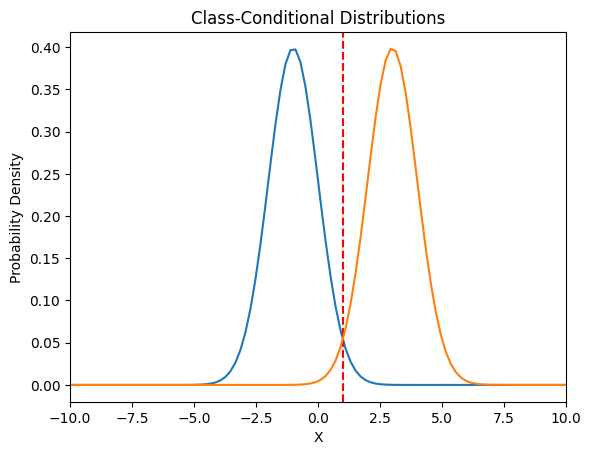

In [2]:
# initialize the parameters
mu_1 = -1
mu_2 = 3
pooled_variance = 1

# initialize the random variables
x = np.linspace(-10, 10, 100)
Y_1 = norm.pdf(
    x = x,
    loc = mu_1,
    scale = pooled_variance
)
Y_2 = norm.pdf(
    x = x,
    loc = mu_2,
    scale = pooled_variance
)

# plot the distributions
plt.plot(x, Y_1, label = 'Y_1')
plt.axvline(
    x=1, 
    color='r', 
    linestyle='--', 
    label='Decision Boundary'
)
# Add labels and title
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Class-Conditional Distributions")
plt.plot(x, Y_2, label = 'Y_2')
plt.xlim(-10, 10)

## Bayes Classifier

The **Bayes Classifier** is the theoretical optimal classifier that minimizes the probability of misclassification. It assigns a new observation $ X $ to the class $ k $ that has the highest posterior probability:

$$
P(Y = k \mid X = x) = \frac{P(X = x \mid Y = k) P(Y = k)}{P(X = x)}
$$

By Bayes' Theorem, the **Bayes Classifier** assigns $ X $ to the class:

$$
\hat{Y} = \arg\max_k P(Y = k \mid X = x)
$$

where:
- $ P(Y = k) $ is the prior probability of class $ k $,
- $ P(X = x \mid Y = k) $ is the class-conditional density,
- $ P(X = x) $ is the marginal density of $ X $.

If we know the true class-conditional distributions, the Bayes Classifier is optimal. However, in practice, these distributions are unknown, and we approximate them using models like **LDA** and **QDA**.

## Question 6

### Part A

In this section, I'll be analyzing percentage returns data from the S&P 500 index.

In [3]:
market = pd.read_csv("/workspaces/stats_503/homework_4/smarket.csv")
market.drop("Unnamed: 0", axis = 1, inplace = True)

I'm examining the pair plots below and I really don't see much relationship visually between any of the predictors. The 1, 2, 3, 4, and 5-day lags don't show a particular relationship between one another, nor with the returns of today's returns.

In [4]:
# subset data from 2001 - 2004
X_training = market.loc[market["Year"] < 2005, ["Lag1", "Lag2"]]
y_training = market.loc[market["Year"] < 2005, "Direction"]

# generate test data
X_test = market.loc[market["Year"] >= 2005, ["Lag1", "Lag2"]]
y_test = market.loc[market["Year"] >= 2005, "Direction"]

# initialize LDA
lda = LDA()
lda.fit(X_training, y_training)
lda_test_predictions = lda.predict(X_test)

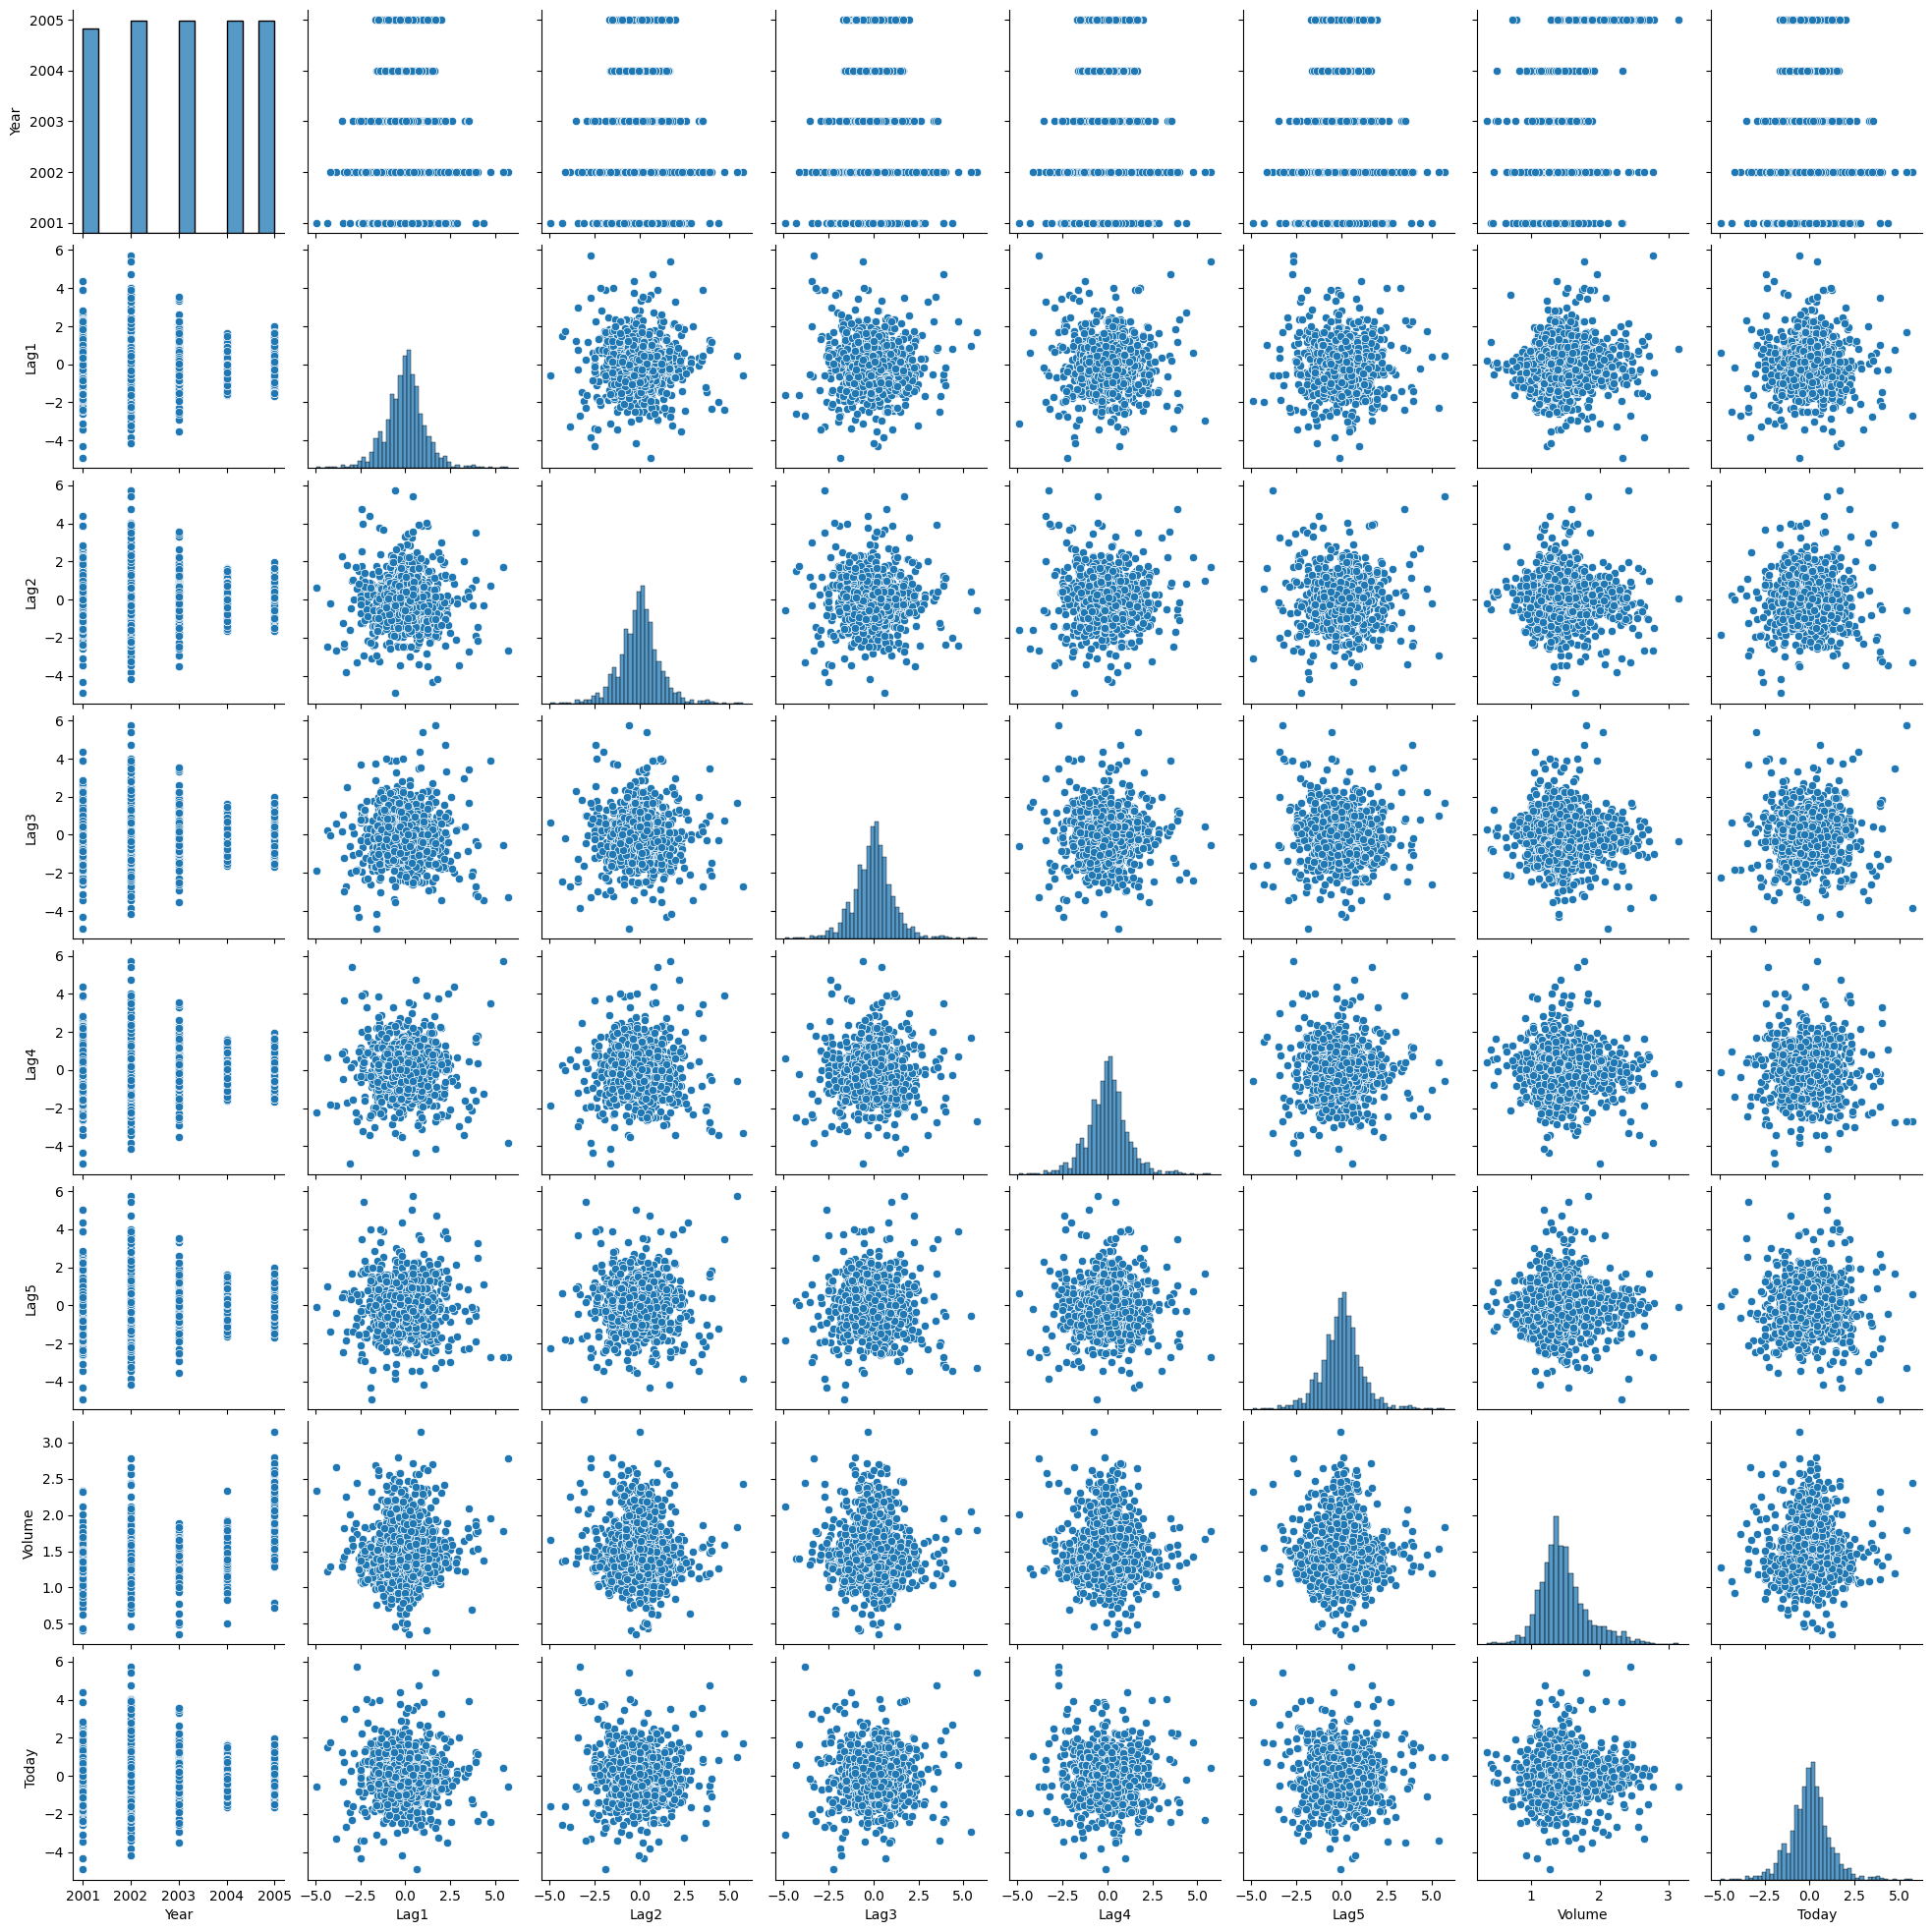

In [5]:
sns.pairplot(market)

### Part B

Fit the LDA model using a training data period from 2001 to 2004, with Direction as the response and `Lag1` and `Lag2` as predictors. Use the model to estimate the Bayes optimal predictions on the held out test data (that is, the data from 2005). Compute the confusion matrix and the overall fraction of correct predictions for the test data.

In [6]:
# subset training data from 2001 - 2004
X_training = market.loc[market["Year"] < 2005, ["Lag1", "Lag2"]]
y_training = market.loc[market["Year"] < 2005, "Direction"]

# subset testing data from 2005 onwards
X_testing = market.loc[market["Year"] >= 2005, ["Lag1", "Lag2"]]
y_testing = market.loc[market["Year"] >= 2005, "Direction"]

# fit the LDA model
lda = LDA()
lda.fit(X_training, y_training)

# make predictions on the training data
lda_train_predictions = lda.predict(X_training)

# make predictions on the testing data
lda_test_predictions = lda.predict(X_testing)

# quantify the accuracy of the model
lda_train_accuracy = np.mean(lda_train_predictions == y_training) * 100
lda_test_accuracy = np.mean(lda_test_predictions == y_testing) * 100

print(f"LDA training accuracy: {lda_train_accuracy}")
print(f"LDA testing accuracy: {lda_test_accuracy}")


LDA training accuracy: 51.60320641282566
LDA testing accuracy: 55.952380952380956


In [7]:
# generate the confusion matrix
confusion_matrix = pd.crosstab(y_testing, lda_test_predictions)
print(confusion_matrix)

col_0      Down   Up
Direction           
Down         35   76
Up           35  106


### Part C

We notice that fitting neither QDA nor LDA on the markets dataset yields strong results. The accuracy for both is only slightly better than random chance, and the testing accuracy is surprisignly better than the training accuracy. I don't know why this is the case, and I'm concerned that there's an error in my code somewhere. This is because we would expect the model to perform better on the dataset on which it was trained than the testing data it hasn't yet seen.

In [8]:
# initialize QDA
qda = QDA()
qda.fit(X_training, y_training)

# make predictions on the training data
qda_train_predictions = qda.predict(X_training)

# make predictions on the testing data
qda_test_predictions = qda.predict(X_testing)

# quantify the accuracy of the model
qda_train_accuracy = np.mean(qda_train_predictions == y_training) * 100
qda_test_accuracy = np.mean(qda_test_predictions == y_testing) * 100

print(f"QDA training accuracy: {qda_train_accuracy}")
print(f"QDA testing accuracy: {qda_test_accuracy}")

QDA training accuracy: 51.40280561122245
QDA testing accuracy: 59.92063492063492


In [9]:
# generate the confusion matrix
confusion_matrix = pd.crosstab(y_testing, qda_test_predictions)
print(confusion_matrix)

col_0      Down   Up
Direction           
Down         30   81
Up           20  121


## Question 7

In this problem, you will develop a model to predict whether a given car will be classified as having high or low gas mileage based on the `auto` data set. Download this data set from Canvas and load it as a data frame.

### Part A
Create a binary variable, `mpg01`, that is equal to 1 if the value of `mpg` for that car is above 25, and 0 otherwise. Add this variable as a new column to your data frame.

In [10]:
auto_data = pd.read_csv("auto.csv")
auto_data = auto_data.drop('Unnamed: 0', axis = 1)

In [11]:
auto_data.loc[auto_data["mpg"] > 25, "mpg01"] = 1
auto_data.loc[auto_data["mpg"] <= 25, "mpg01"] = 0

### Part B
Examining the pair plots of the auto data, I see that the `mpg01` predictor seems to have some relationship with `cylinders`, `displacement`, `horsepower`, and `weight`. I'll use these moving forward to conduct a deeper analysis on the response, `mpg01`.

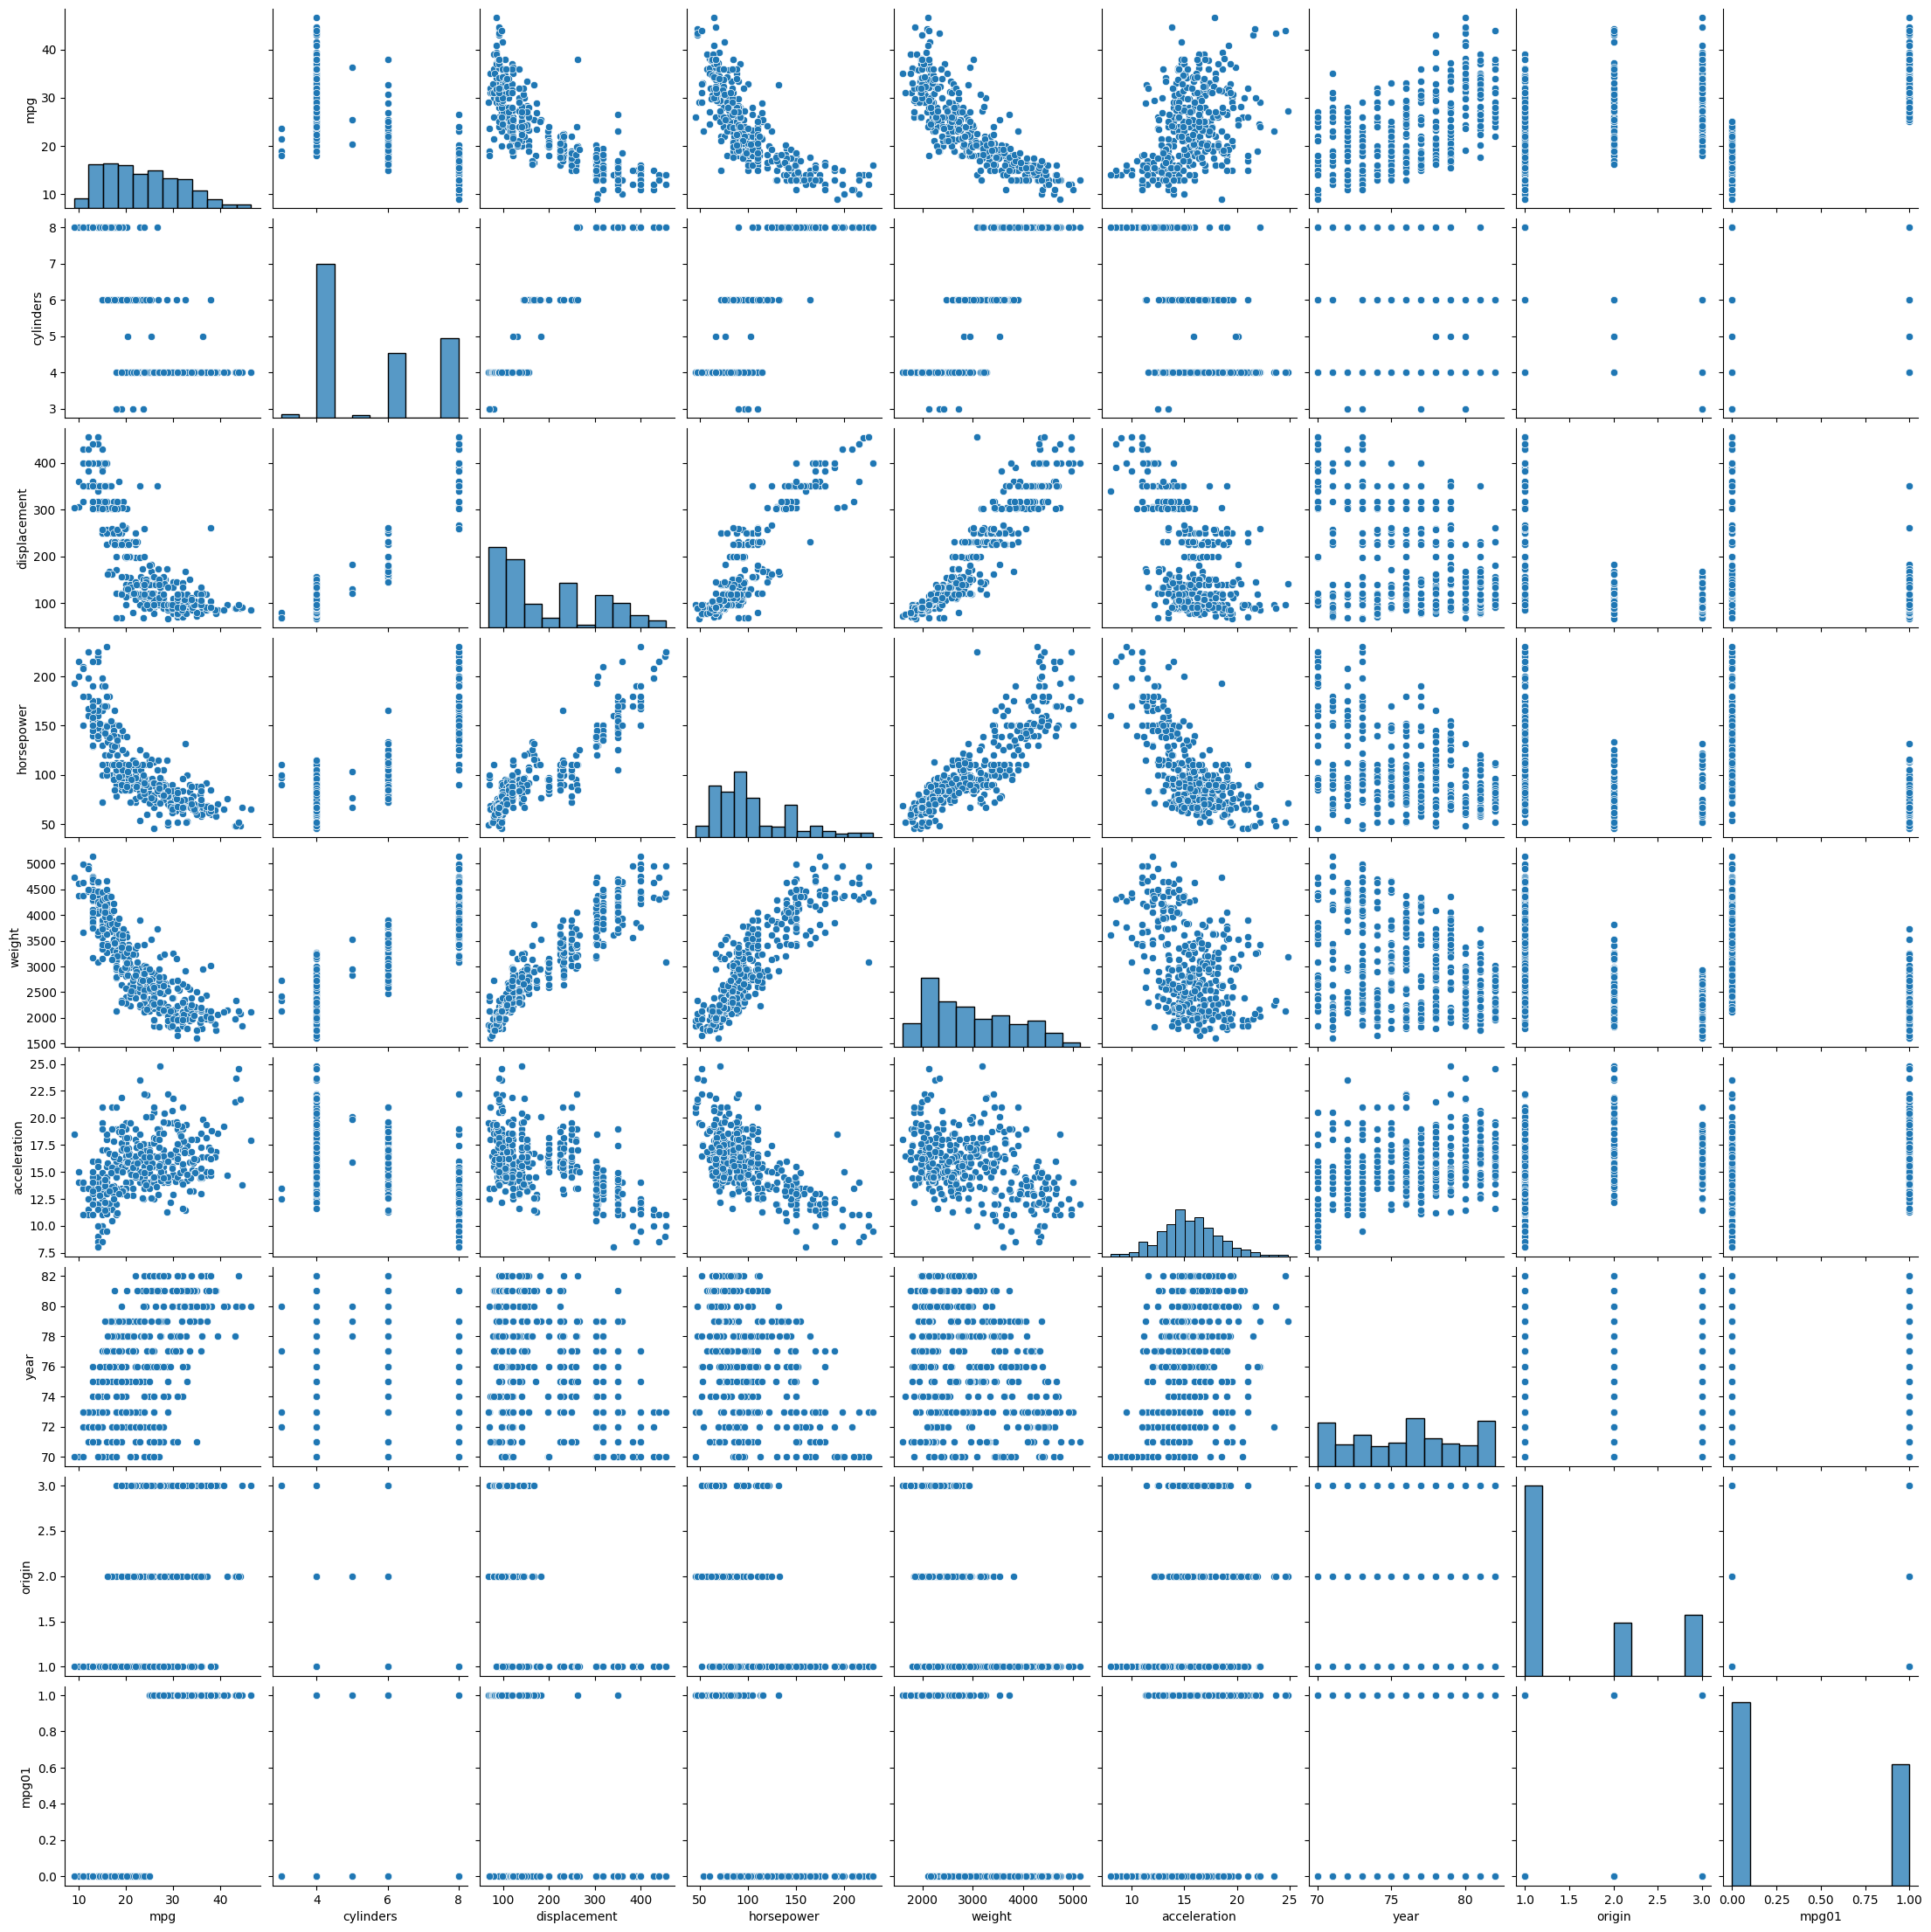

In [12]:
sns.pairplot(auto_data)

### Part C

I'll then split the dataFrame into a training a testing set. I'll also use a specific `random_state` for replicability.

In [13]:
columns_of_interest = ["cylinders", "horsepower", "weight", "displacement"]
predictors = auto_data[columns_of_interest]
target = ["mpg01"]
response = auto_data[target]

X_train, X_test, y_train, y_test = train_test_split( # X matrices versus y vectors
    predictors,
    response,
    test_size = 0.8,
    stratify = auto_data["mpg01"],
    random_state = 123
)
high_mpg_count = len(y_train[y_train == 1])
print(f"""The number of high mpg cars in the training set is {high_mpg_count}.""")

The number of high mpg cars in the training set is 78.


### Part D
I'll use `cylinders`, `displacement`, `horsepower`, and `weight` to predict the class assignments of `mpg01`.

When I assign class labels using the observations in the `X_test` set, then I simply assign the class label of whichever class-conditional probability is highest. Comparing the predictions of these predictions with their actual class labels allows me to find the classification rate of the naive Bayes classifier on the `X_test` set. The misclassification rate is $12.82$% since the training set was used to fit the LDA model. I'd expect that the misclassification rate for `y_test` would be a bit higher.

And weirdly enough, the misclassification rate for `y_test` is somehow lower than that for my training data at $0.318$%. This surprises me quite a bit, honestly.

**Question: I assume that the Naive Bayes classifier would assign the observation to whichever class-conditional probability is highest. Is this correct?**

In [14]:
lda = LDA() # initialize the model
lda.fit(X_train, y_train) # fit it with my training data
prediction_probabilities_x_train = lda.predict_proba(X_train) # generate prediction probabilities for the training predictors
prediction_probabilities_x_test = lda.predict_proba(X_test) # generate prediction probabilities for the training predictors


lda_training_results = X_train.copy()
lda_testing_results = X_test.copy()

# assign training set class probabilites
lda_training_results["class_0_probability"] = [x for x, y in prediction_probabilities_x_train]
lda_training_results["class_1_probability"] = [y for x, y in prediction_probabilities_x_train]

# assign testing set class probabilites
lda_testing_results["class_0_probability"] = [x for x, y in prediction_probabilities_x_test]
lda_testing_results["class_1_probability"] = [y for x, y in prediction_probabilities_x_test]

# add the true class labels
lda_training_results["true_class_label"] = y_train
lda_testing_results["true_class_label"] = y_test

# generate naive bayes classifications
lda_training_results.loc[lda_training_results["class_0_probability"] > lda_training_results["class_1_probability"], "naive_bayes_prediction"] = 0
lda_training_results.loc[lda_training_results["class_0_probability"] <= lda_training_results["class_1_probability"], "naive_bayes_prediction"] = 1

# generate naive bayes classifications
lda_testing_results.loc[lda_testing_results["class_0_probability"] > lda_testing_results["class_1_probability"], "naive_bayes_prediction"] = 0
lda_testing_results.loc[lda_testing_results["class_0_probability"] <= lda_testing_results["class_1_probability"], "naive_bayes_prediction"] = 1

# calculate misclassification rate
lda_training_results["misclassification"] = lda_training_results["naive_bayes_prediction"] != lda_training_results["true_class_label"]
lda_testing_results["misclassification"] = lda_testing_results["naive_bayes_prediction"] != lda_testing_results["true_class_label"]

training_misclassification_rate = lda_training_results["misclassification"].mean() * 100
testing_misclassification_rate = lda_testing_results["misclassification"].mean() * 100
print(f"training misclassification rate: {training_misclassification_rate}\ntesting misclassification rate: {testing_misclassification_rate}")

training misclassification rate: 12.82051282051282
testing misclassification rate: 18.152866242038215


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


I can use scatterplots to look at the observations for the training data points and their corresponding class labels.

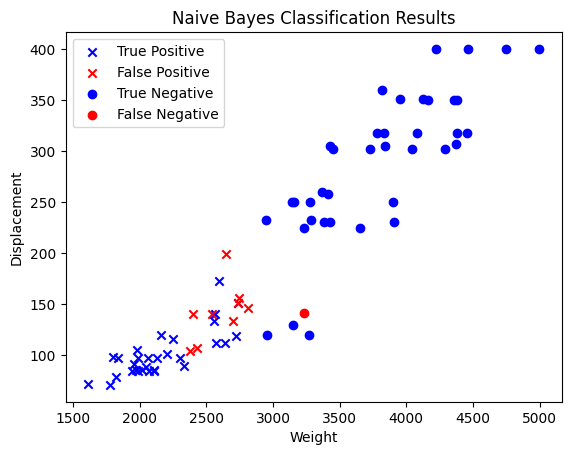

In [15]:
fig, ax = plt.subplots()

ax.scatter(
    x = lda_training_results.loc[(lda_training_results["naive_bayes_prediction"] == 1) & (lda_training_results["true_class_label"] == 1), "weight"],
    y = lda_training_results.loc[(lda_training_results["naive_bayes_prediction"] == 1) & (lda_training_results["true_class_label"] == 1), "displacement"],
    color = "blue",
    label = "True Positive",
    marker = "x"
)
ax.scatter(
    x = lda_training_results.loc[(lda_training_results["naive_bayes_prediction"] == 1) & (lda_training_results["true_class_label"] == 0), "weight"],
    y = lda_training_results.loc[(lda_training_results["naive_bayes_prediction"] == 1) & (lda_training_results["true_class_label"] == 0), "displacement"],
    color = "red",
    label = "False Positive",
    marker = "x"
)
ax.scatter(
    x = lda_training_results.loc[(lda_training_results["naive_bayes_prediction"] == 0) & (lda_training_results["true_class_label"] == 0), "weight"],
    y = lda_training_results.loc[(lda_training_results["naive_bayes_prediction"] == 0) & (lda_training_results["true_class_label"] == 0), "displacement"],
    color = "blue",
    label = "True Negative",
    marker = "o"
)
ax.scatter(
    x = lda_training_results.loc[(lda_training_results["naive_bayes_prediction"] == 0) & (lda_training_results["true_class_label"] == 1), "weight"],
    y = lda_training_results.loc[(lda_training_results["naive_bayes_prediction"] == 0) & (lda_training_results["true_class_label"] == 1), "displacement"],
    color = "red",
    label = "False Negative",
    marker = "o"
)
ax.set(
    xlabel = "Weight",
    ylabel = "Displacement",
    title = "Naive Bayes Classification Results"
)
ax.legend()
plt.show()

### Part E

Next, I'll use a QDA to do the same analysis.

In [16]:
qda = QDA() # initialize the model
y_train = y_train # convert the training responses to a one-dimensional array
qda.fit(X_train, y_train) # fit it with my training data
prediction_probabilities_x_train = qda.predict_proba(X_train) # generate prediction probabilities for the training predictors
prediction_probabilities_x_test = qda.predict_proba(X_test) # generate prediction probabilities for the training predictors

qda_training_results = X_train.copy()
qda_testing_results = X_test.copy()

# assign training set class probabilites
qda_training_results["class_0_probability"] = [x for x, y in prediction_probabilities_x_train]
qda_training_results["class_1_probability"] = [y for x, y in prediction_probabilities_x_train]

# assign training set class probabilites
qda_testing_results["class_0_probability"] = [x for x, y in prediction_probabilities_x_test]
qda_testing_results["class_1_probability"] = [y for x, y in prediction_probabilities_x_test]

# add the true class labels
qda_training_results["true_class_label"] = y_train

# add the true class labels
qda_testing_results["true_class_label"] = y_test

# generate naive bayes classifications
qda_training_results.loc[qda_training_results["class_0_probability"] > qda_training_results["class_1_probability"], "naive_bayes_prediction"] = 0
qda_training_results.loc[qda_training_results["class_0_probability"] <= qda_training_results["class_1_probability"], "naive_bayes_prediction"] = 1

qda_testing_results.loc[qda_testing_results["class_0_probability"] > qda_testing_results["class_1_probability"], "naive_bayes_prediction"] = 0
qda_testing_results.loc[qda_testing_results["class_0_probability"] <= qda_testing_results["class_1_probability"], "naive_bayes_prediction"] = 1

# calculate misclassification rate
qda_training_results["misclassification"] = qda_training_results["naive_bayes_prediction"] != qda_training_results["true_class_label"]
qda_testing_results["misclassification"] = qda_testing_results["naive_bayes_prediction"] != qda_testing_results["true_class_label"]


training_misclassification_rate = qda_training_results["misclassification"].mean() * 100
testing_misclassification_rate = qda_testing_results["misclassification"].mean() * 100

print(f"training misclassification rate: {training_misclassification_rate}\ntesting misclassification rate: {testing_misclassification_rate}")

training misclassification rate: 10.256410256410255
testing misclassification rate: 15.605095541401273


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


It's worth noting that the test misclassification rate for QDA is lower than the misclassification rate for the same test set predicted using LDA. This suggests that the covariance structure isn't the same across all of our classes and that we're better served by fitting a unique covariance matrix to each individual class.

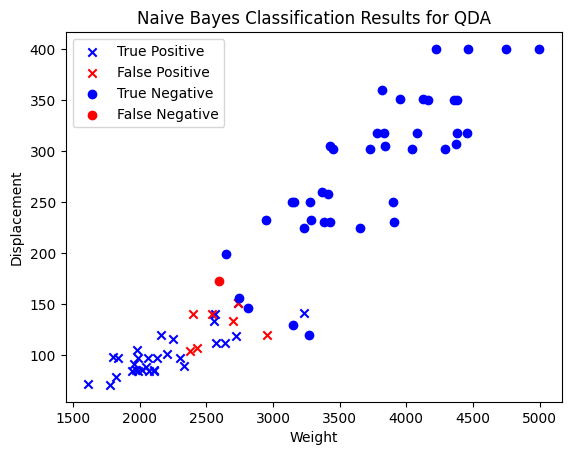

In [17]:
fig, ax = plt.subplots()

ax.scatter(
    x = qda_training_results.loc[(qda_training_results["naive_bayes_prediction"] == 1) & (qda_training_results["true_class_label"] == 1), "weight"],
    y = qda_training_results.loc[(qda_training_results["naive_bayes_prediction"] == 1) & (qda_training_results["true_class_label"] == 1), "displacement"],
    color = "blue",
    label = "True Positive",
    marker = "x"
)
ax.scatter(
    x = qda_training_results.loc[(qda_training_results["naive_bayes_prediction"] == 1) & (qda_training_results["true_class_label"] == 0), "weight"],
    y = qda_training_results.loc[(qda_training_results["naive_bayes_prediction"] == 1) & (qda_training_results["true_class_label"] == 0), "displacement"],
    color = "red",
    label = "False Positive",
    marker = "x"
)
ax.scatter(
    x = qda_training_results.loc[(qda_training_results["naive_bayes_prediction"] == 0) & (qda_training_results["true_class_label"] == 0), "weight"],
    y = qda_training_results.loc[(qda_training_results["naive_bayes_prediction"] == 0) & (qda_training_results["true_class_label"] == 0), "displacement"],
    color = "blue",
    label = "True Negative",
    marker = "o"
)
ax.scatter(
    x = qda_training_results.loc[(qda_training_results["naive_bayes_prediction"] == 0) & (qda_training_results["true_class_label"] == 1), "weight"],
    y = qda_training_results.loc[(qda_training_results["naive_bayes_prediction"] == 0) & (qda_training_results["true_class_label"] == 1), "displacement"],
    color = "red",
    label = "False Negative",
    marker = "o"
)
ax.set(
    xlabel = "Weight",
    ylabel = "Displacement",
    title = "Naive Bayes Classification Results for QDA"
)
ax.legend()
plt.show()

The difference between the LDA and the QDA is pretty huge. We had a fair amount of misclassification in the LDA, particularly when there were nonzero probabilities of both class 0 and class 1 for a particular observation. With QDA, we have no misclassification in the training set, which indicates that QDA is a much better classifier than LDA.

Similarly, QDA performs much better when our classes have unique covariance structures. The fact that we see a lower misclassification rate using QDA implies that the covariance within each of the classes is not the same. Our classification would therefore benefit from a more bespoke classifier than LDA.

### Part G

I use this block to fit the logistic regression, which doesn't seem to outperform the QDA fitted using the same training data. While the testing error for the QDA hovers around ~$15$%, I notice that the testing error for the Logistic Regression reaches  little over $18$%. This suggests that  the Logistic Regression wouldn't be as strong a choice for classifying `mpg01` as the QDA.

In [18]:
logistic_regression_model = LogisticRegression() # initialize the model
logistic_regression_model.fit(X_train, y_train) # fit it with my training data
prediction_probabilities_x_train = logistic_regression_model.predict(X_train) # generate prediction probabilities for the training predictors
prediction_probabilities_x_test = logistic_regression_model.predict(X_test) # generate prediction probabilities for the training predictors

logistic_regression_training_results = X_train.copy()
logistic_regression_testing_results = X_test.copy()

# assign training set class probabilites
logistic_regression_training_results["predicted_class_label"] = prediction_probabilities_x_train
logistic_regression_testing_results["predicted_class_label"] = prediction_probabilities_x_test

# add the true class labels
logistic_regression_training_results["true_class_label"] = y_train
logistic_regression_testing_results["true_class_label"] = y_test

# calculate training misclassification rate
logistic_regression_training_results["misclassification"] = logistic_regression_training_results["predicted_class_label"] != logistic_regression_training_results["true_class_label"]
training_misclassification_rate = logistic_regression_training_results["misclassification"].mean() * 100

# calculate testing misclassification rate
logistic_regression_testing_results["misclassification"] = logistic_regression_testing_results["predicted_class_label"] != logistic_regression_testing_results["true_class_label"]
testing_misclassification_rate = logistic_regression_testing_results["misclassification"].mean() * 100

print(f"training misclassification rate: {training_misclassification_rate}\ntesting misclassification rate: {testing_misclassification_rate}")

training misclassification rate: 10.256410256410255
testing misclassification rate: 18.152866242038215


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


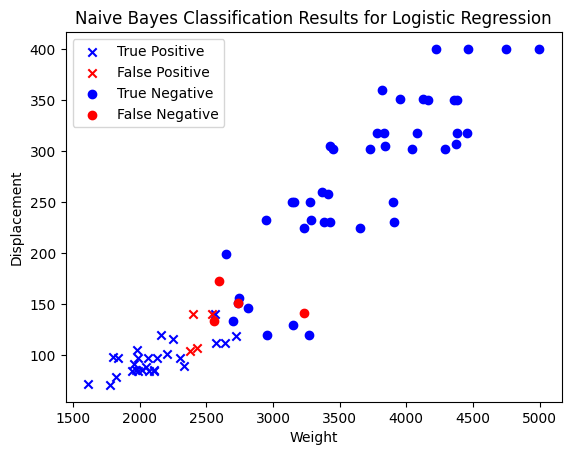

In [19]:
fig, ax = plt.subplots()

ax.scatter(
    x = logistic_regression_training_results.loc[(logistic_regression_training_results["predicted_class_label"] == 1) & (logistic_regression_training_results["true_class_label"] == 1), "weight"],
    y = logistic_regression_training_results.loc[(logistic_regression_training_results["predicted_class_label"] == 1) & (logistic_regression_training_results["true_class_label"] == 1), "displacement"],
    color = "blue",
    label = "True Positive",
    marker = "x"
)
ax.scatter(
    x = logistic_regression_training_results.loc[(logistic_regression_training_results["predicted_class_label"] == 1) & (logistic_regression_training_results["true_class_label"] == 0), "weight"],
    y = logistic_regression_training_results.loc[(logistic_regression_training_results["predicted_class_label"] == 1) & (logistic_regression_training_results["true_class_label"] == 0), "displacement"],
    color = "red",
    label = "False Positive",
    marker = "x"
)
ax.scatter(
    x = logistic_regression_training_results.loc[(logistic_regression_training_results["predicted_class_label"] == 0) & (logistic_regression_training_results["true_class_label"] == 0), "weight"],
    y = logistic_regression_training_results.loc[(logistic_regression_training_results["predicted_class_label"] == 0) & (logistic_regression_training_results["true_class_label"] == 0), "displacement"],
    color = "blue",
    label = "True Negative",
    marker = "o"
)
ax.scatter(
    x = logistic_regression_training_results.loc[(logistic_regression_training_results["predicted_class_label"] == 0) & (logistic_regression_training_results["true_class_label"] == 1), "weight"],
    y = logistic_regression_training_results.loc[(logistic_regression_training_results["predicted_class_label"] == 0) & (logistic_regression_training_results["true_class_label"] == 1), "displacement"],
    color = "red",
    label = "False Negative",
    marker = "o"
)
ax.set(
    xlabel = "Weight",
    ylabel = "Displacement",
    title = "Naive Bayes Classification Results for Logistic Regression"
)
ax.legend()
plt.show()

### Question H

Using your fitted logistic regression model, estimate the probability of a car having mpg above 25 if its values for the four predictors are all at the corresponding median values in the training dataset.

> I do so and we notice that there's a $79.97$% chance of class 0 membership and $20.02$% chance of class 1 membership. This indicates that more than half of the observations in our dataset would be attributes to the low-mpg class.

In [20]:
# set the values of our parameters
cylinders_median = X_train["cylinders"].median()
horsepower_median = X_train["horsepower"].median()
weight_median = X_train["weight"].median()
displacement_median = X_train["displacement"].median()

# get the prediction probability using predict_na 
# and the median values of the predictors
print(logistic_regression_model.predict_proba([[cylinders_median, horsepower_median, weight_median, displacement_median]]))

[[0.79970583 0.20029417]]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Part I

Next, we use the KNN algorithm to solve the problems previously stated. I'll need to choose a value for K that optimizes my bias-variance tradeoff, which we can evaluate by analyzing the training and test misclassification rates.

In [21]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier

def knn_optimization(n):
    training_errors = list()
    testing_errors = list()

    for k in range(1, n):
        # initialize the model
        knn = KNeighborsClassifier(n_neighbors = k)

        # fit the model
        knn.fit(X_train, y_train)

        # generate training predictions
        knn_training_predictions = knn.predict(X_train)

        # generate test predictions
        knn_test_predictions = knn.predict(X_test)

        # Calculate test misclassification rate
        test_misclassification_rate = sum(knn_test_predictions != y_test.values.ravel()) / len(y_test)
        testing_errors.append(test_misclassification_rate)

        # Calculate training misclassification rate
        train_misclassification_rate = sum(x != y for x, y in zip(knn_training_predictions, y_train.values.ravel())) / len(y_train)
        training_errors.append(train_misclassification_rate)

    results = pd.DataFrame(
        {
            "k": range(1, n),
            "training_errors": training_errors,
            "testing_errors": testing_errors
        }
    )
    return results

In [22]:
error_rates = knn_optimization(20)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

<Axes: title={'center': 'Figure 7.1: Error Rate as a Function of K'}, xlabel='k = number of neighbors', ylabel='Error Rate'>

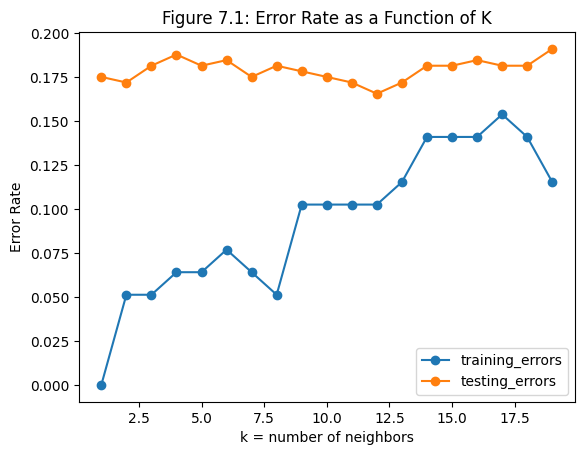

In [23]:
error_rates.plot(x = "k", 
                 y = ["training_errors", "testing_errors"],
                 xlabel = "k = number of neighbors",
                 marker = "o",
                 ylabel = "Error Rate",
                 title = "Figure 7.1: Error Rate as a Function of K"
                )

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

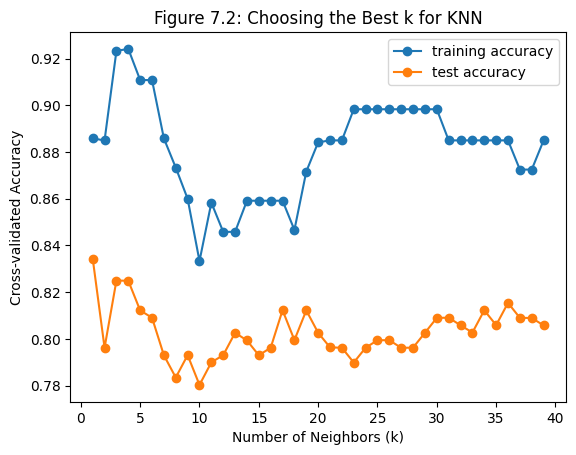

In [24]:
from sklearn.model_selection import cross_val_score

# Test different values of k
k_values = range(1, 40)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    train_score = cross_val_score(knn, X_train, y_train, cv=5).mean()  # 5-fold cross-validation
    test_score = cross_val_score(knn, X_test, y_test, cv=5).mean()
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot accuracy vs k
plt.plot(k_values, train_scores, marker='o', label = "training accuracy")
plt.plot(k_values, test_scores, marker='o', label = "test accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-validated Accuracy")
plt.title("Figure 7.2: Choosing the Best k for KNN")
plt.legend()
plt.show()

We see that the error rate of our training set actually increases as the number of neighbors increases. Based on the information provided in Figure 7.1, I would optimize my Training Classifier at k = 8 and my Test Classifier at k = 12. But if I were to choose between the two, I'd optimize according to my test classification error. This would be more indicative of the model's performance when launched to production and faced with new data.

One concern could be that I'm not using my whole dataset for validation when I only use 20% of the samples to get a testing score. To improve my parameter tuning, I'm also running a 5-fold cross validation using testing and validation sets to get a fuller set of the model's performance, and results are shown in Figure 7.2. The 5-fold validation test accuracy supports the notion that 8 neighbors is ideal.

### Part J

We'll initialize the final KNN model using the `k = 8` parameter that was identified during the previous exercise.

In [25]:
# initialize the model
knn = KNeighborsClassifier(n_neighbors = 8)

# fit the model 
knn.fit(X_train, y_train)

knn_training_set = X_train.copy()
knn_test_set = X_test.copy()

knn_y_train = y_train.copy()
knn_y_test = y_test.copy()

# generate training predictions
knn_training_predictions = knn.predict(X_train)

# attach to the training data
knn_training_set["predicted_class_label"] = knn_training_predictions

# generate test predictions
knn_test_predictions = knn.predict(X_test)

# attach to the test data
knn_test_set["predicted_class_label"] = knn_test_predictions

# generate test misclassification rate
misclassified = [1 if x != y else 0 for x, y in zip(knn_training_predictions, knn_y_train.mpg01.ravel())]

# attach to the training data
knn_training_set["misclassified"] = misclassified

# calculate test misclassification rate
test_misclassification_rate = (knn_test_predictions != y_test.values.ravel()).mean() * 100

# calculate train misclassification rate
train_misclassification_rate = (knn_training_predictions != y_train.values.ravel()).mean() * 100

print(f"""The training misclassification rate is {train_misclassification_rate} and the test misclassification rate is {test_misclassification_rate}.""")

The training misclassification rate is 5.128205128205128 and the test misclassification rate is 18.152866242038215.


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/tmp/ipykernel_64185/4221383390.py:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  misclassified = [1 if x != y else 0 for x, y in zip(knn_training_predictions, knn_y_train.mpg01.ravel())]


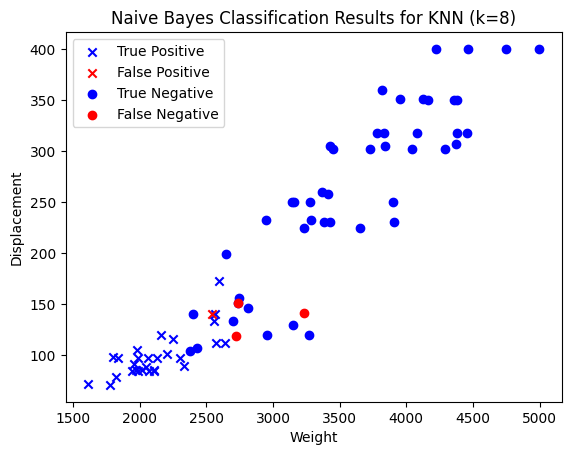

In [26]:
# plot the classifications for displacement and weight
fig, ax = plt.subplots()

ax.scatter(
    x = knn_training_set.loc[(knn_training_set["predicted_class_label"] == 1) & (knn_training_set["misclassified"] == 0), "weight"],
    y = knn_training_set.loc[(knn_training_set["predicted_class_label"] == 1) & (knn_training_set["misclassified"] == 0), "displacement"],
    color = "blue",
    label = "True Positive",
    marker = "x"
)

ax.scatter(
    x = knn_training_set.loc[(knn_training_set["predicted_class_label"] == 1) & (knn_training_set["misclassified"] == 1), "weight"],
    y = knn_training_set.loc[(knn_training_set["predicted_class_label"] == 1) & (knn_training_set["misclassified"] == 1), "displacement"],
    color = "red",
    label = "False Positive",
    marker = "x"
)

ax.scatter(
    x = knn_training_set.loc[(knn_training_set["predicted_class_label"] == 0) & (knn_training_set["misclassified"] == 0), "weight"],
    y = knn_training_set.loc[(knn_training_set["predicted_class_label"] == 0) & (knn_training_set["misclassified"] == 0), "displacement"],
    color = "blue",
    label = "True Negative",
    marker = "o"
)

ax.scatter(
    x = knn_training_set.loc[(knn_training_set["predicted_class_label"] == 0) & (knn_training_set["misclassified"] == 1), "weight"],
    y = knn_training_set.loc[(knn_training_set["predicted_class_label"] == 0) & (knn_training_set["misclassified"] == 1), "displacement"],
    color = "red",
    label = "False Negative",
    marker = "o"
)

ax.set(
    xlabel = "Weight",
    ylabel = "Displacement",
    title = "Naive Bayes Classification Results for KNN (k=8)"
)
ax.legend()
plt.show()

We can see in Figure 7.3 that the KNN classifier does pretty well, but runs into the same issue as the QDA where there is some misclassification near the decision boundary as the class-conditional probabilities reach their tails. This seems to impact our False Negatives the most, suggesting the algorithm misclassifies high-MPG cars as the opposite.

In [27]:
# set the values of our parameters
cylinders_median = X_train["cylinders"].median()
horsepower_median = X_train["horsepower"].median()
weight_median = X_train["weight"].median()
displacement_median = X_train["displacement"].median()

new_observation = np.array([[cylinders_median, horsepower_median, weight_median, displacement_median]])

# Get probability estimates
probabilities = knn.predict_proba(new_observation)

# Print probabilities
print("Class Probabilities:", probabilities)

Class Probabilities: [[0.75 0.25]]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


And when we use the medians of the `horsepower`, `weight`, `displacement`, and `cylinders` predictors to estimate the probability of these yielding a positive class identification (a vehicle higher than 25 mpg), we find that the probability of a class assignment of 1 is $25$%. This isn't very likely.